# Heart Disease Prediction by using Support Vector Machine

#### Analysis & Modelling done by Gaurav S. Padawe 

### Domain : Healthcare

**Download : https://archive.ics.uci.edu/ml/datasets/Heart+Disease**

### Source :

#### Creators : 

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. 

#### Donor : 

David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

#### Data Set Information :

- This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 

- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. 

- One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory. 

- To see Test Costs (donated by Peter Turney), please see the folder "Costs"

### Attribute Information :

Only 14 attributes used: 
<b>
1. #3 (age) 
2. #4 (sex) 
3. #9 (cp) 
4. #10 (trestbps) 
5. #12 (chol) 
6. #16 (fbs) 
7. #19 (restecg) 
8. #32 (thalach) 
9. #38 (exang) 
10. #40 (oldpeak) 
11. #41 (slope) 
12. #44 (ca) 
13. #51 (thal) 
14. #58 (num) (the predicted attribute)</b>

### Complete attribute documentation :<br>

<b>
- age: age in years


- sex: sex (1 = male; 0 = female) 


- cp: chest pain type
    - Value 1: typical angina 
    - Value 2: atypical angina 
    - Value 3: non-anginal pain 
    - Value 4: asymptomatic 


- trestbps: resting blood pressure (in mm Hg on admission to the hospital) 


- chol: serum cholestoral in mg/dl


- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


- restecg: resting electrocardiographic results 
    - Value 0: normal 
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


- thalach: maximum heart rate achieved


- exang: exercise induced angina (1 = yes; 0 = no) 


- oldpeak = ST depression induced by exercise relative to rest 


- slope: the slope of the peak exercise ST segment 
    - Value 1: upsloping 
    - Value 2: flat 
    - Value 3: downsloping


- ca: number of major vessels (0-3) colored by flourosopy


- num: diagnosis of heart disease (angiographic disease status) 
    - Value 0: < 50% diameter narrowing 
    - Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)

### Questionnaire :

- What Age group do we've in our data ?

- If we've missing values, What approach we can take ?

- Since, this is a Classification Problem will we get to see multi-class Imbalance ? If so , what approach we can take ?


### Objective :

- To analyze and build model for Switzerland dataset.
- First I'll do Data processing followed by EDA.
- My aim is to make a statistical model with the help of SVM Classifier which will predict the vulnerability of heart disease for given patient(s) data.

### Importing required Modules

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('switzerland.data', names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
data.replace('?', np.nan, inplace=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,NaN,0,127,0,.7,1,NaN,NaN,1
1,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3
3,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1
4,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2


### Data Cleansing and Processing¶

In [4]:
#Shape of dataset

print ('Number of Examples :', data.shape[0], '\nNumber of Features : ', data.shape[1])

Number of Examples : 123 
Number of Features :  14


- We can see that our Dataset contains **123 examples / predictors** and **14 features (including Target).**

In [5]:
#Let us check datset's attribute info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
age         123 non-null int64
sex         123 non-null int64
cp          123 non-null int64
trestbps    121 non-null object
chol        123 non-null int64
fbs         48 non-null object
restecg     122 non-null object
thalach     122 non-null object
exang       122 non-null object
oldpeak     117 non-null object
slope       106 non-null object
ca          5 non-null object
thal        71 non-null object
num         123 non-null int64
dtypes: int64(5), object(9)
memory usage: 13.5+ KB


- Above results shows us that we've :
    - **(5) x int64** datatype attributes
    - **(9) x object** datatype attributes.

In [6]:
#Examining Null values in each feature

data.isnull().sum()

age           0
sex           0
cp            0
trestbps      2
chol          0
fbs          75
restecg       1
thalach       1
exang         1
oldpeak       6
slope        17
ca          118
thal         52
num           0
dtype: int64

- We can examine that we got null values in following features :<b>
    - trestbps      (2)<br>
    - fbs          (75)<br>
    - restecg       (1)<br>
    - thalach       (1)<br>
    - exang         (1)<br>
    - oldpeak       (6)<br>
    - slope        (17)<br>
    - ca          (118)<br>
    - thal         (52)<br>

In [7]:
#Let us also check % missing values

data.isnull().sum() / data.shape[0] * 100

age          0.000000
sex          0.000000
cp           0.000000
trestbps     1.626016
chol         0.000000
fbs         60.975610
restecg      0.813008
thalach      0.813008
exang        0.813008
oldpeak      4.878049
slope       13.821138
ca          95.934959
thal        42.276423
num          0.000000
dtype: float64

- Percent Missing Values :<b>
    - 1.62% trestbps
    - 60.9% fbs
    - 0.81% restecg
    - 0.81% thalach
    - 0.81% exang
    - 4.87% oldpeak
    - 13.8% slope
    - 95.9% ca
    - 42.2% thal
    
    
    
- We'll Fill NAN's of all features with **median** values of that particular feature because **mean / average** filling values approach won't make any sense since we've **discrete** values in some features.


- One can also try **Backward / Forward** fill method.


- We can observe that **fbs and ca has 60.9% and 95.9% missing values** respectively so we can **drop** these features.


- Theoretically, **25 to 30%** is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis.

In [0]:
#Filling missing values with median
data['trestbps'].fillna(data['trestbps'].median(), inplace=True)
data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)
data['slope'].fillna(int(data['slope'].median()), inplace=True)
data['thal'].fillna(int(data['thal'].median()), inplace=True)
data['restecg'].fillna(int(data['restecg'].median()), inplace=True)
data['thalach'].fillna(data['thalach'].median(), inplace=True)
data['exang'].fillna(int(data['exang'].median()), inplace=True)

#Replacing similar values
data['restecg'].replace([0.0, 0],[0,0], inplace=True)
data['slope'].replace([2.0, 2],[2,2], inplace=True)
data['thal'].replace([7.0, 7],[7,7], inplace=True)
data['exang'].replace([0.0, 0],[0,0], inplace=True)

#Changing dtypes
data['trestbps'] = data['trestbps'].astype('int')
data['oldpeak'] = data['oldpeak'].astype('float')
data['slope'] = data['slope'].astype('category')
data['thal'] = data['thal'].astype('category')
data['restecg'] = data['restecg'].astype('category')
data['thalach'] = data['thalach'].astype('int')
data['exang'] = data['exang'].astype('category')
data['sex'] = data['sex'].astype('category')
data['cp'] = data['cp'].astype('category')
data['num'] = data['num'].astype('category')

- We had used **median** approach to fill missing values.


- Also, we had changed dtype of some features to **"category"** type as they have discrete values.

In [10]:
#Identifying dtypes

data.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs           object
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca            object
thal        category
num         category
dtype: object

In [11]:
#Dropping columns

data.drop(['ca', 'fbs', 'chol'], axis=1, inplace=True)
data.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,thal,num
0,32,1,1,95,0,127,0,0.7,1,7,1
1,34,1,4,115,0,154,0,0.2,1,7,1
2,35,1,4,125,0,130,1,0.3,2,7,3
3,36,1,4,110,0,125,1,1.0,2,6,1
4,38,0,4,105,0,166,0,2.8,1,7,2


- We'll drop columns **"ca", "fbs", "chol"**.


- **chol** because it contains only 0. So we have to drop it.

### EDA

- We'll explore various features in this section.


- We'll observe descriptive statistics which will give us brief idea about spread of individual features.


- Then we'll also visualize some features to get better idea about discrete values.


- Visualizing Target attribute will shows us if we've imbalanced dataset.

In [12]:
#Descriptive Stats

data.describe()

,age,trestbps,thalach,oldpeak
count,123.000000,123.000000,123.000000,123.000000
mean,55.317073,130.121951,121.552846,0.636585
std,9.032108,22.383244,25.870802,1.032605
min,32.000000,80.000000,60.000000,-2.600000
25%,51.000000,115.000000,104.500000,0.000000
50%,56.000000,125.000000,121.000000,0.300000
75%,61.500000,145.000000,140.000000,1.450000
max,74.000000,200.000000,182.000000,3.700000


<b>Descriptive Statistics :</b>

- We can observe from above table that we have **123 examples.**


- The Spread of **Age** is from **32 to 74.**


- **Resting blood pressure** is distributed from **80 to 200 (in mm Hg).**


- Similarly, **thalach (maximum heart rate achieved)** ranges from **60 to 182.**


- While, **oldpeak (ST depression induced by exercise relative to rest)** values ranges from **-2.60 to 3.70.**

Text(0.5, 1.0, 'Pearson Correlation')

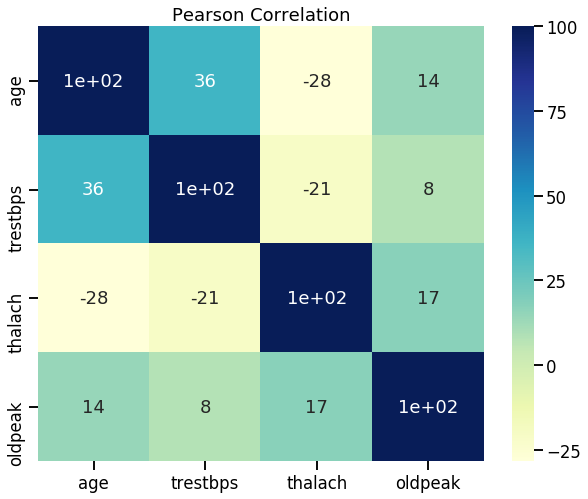

In [13]:
#Pearson Correlation

plt.figure(figsize=(10, 8))
sns.set_context('talk')
sns.heatmap(data.corr()*100, annot=True, cmap='YlGnBu')
plt.title('Pearson Correlation')

<b>Pearson Correlation (Scaled) : </b>

- We can identify that there is quite **positive correlation** between **"trestbps" and "age".**


- While, **negative correlation** is observed between **"thalach" and "age"** , i.e, **most of the peoples heartbeat has been found increasing as they grow old.**


- Other than that we don't see much of a strong correlation in features.

Text(0.5, 1.0, 'Distribution of ST depression')

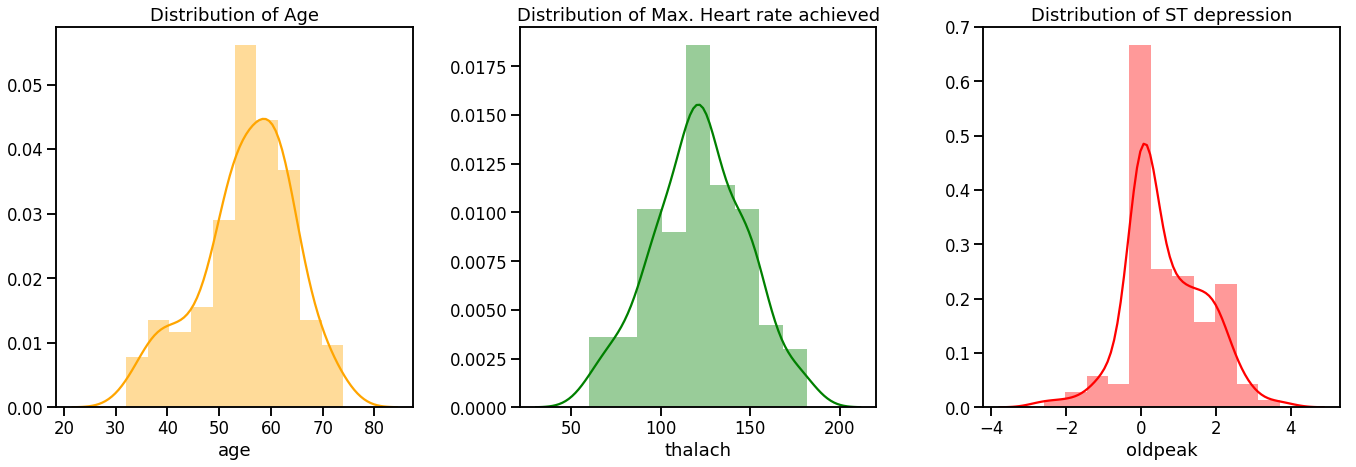

In [14]:
#Spread of Age, thalach & oldpeak

plt.figure(figsize=(23,7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(1, 3, 1)
sns.distplot(data['age'] , color='orange')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.distplot(data['thalach'], color='g')
plt.title('Distribution of Max. Heart rate achieved')

plt.subplot(1, 3, 3)
sns.distplot(data['oldpeak'], color='r')
plt.title('Distribution of ST depression')


- Above viz. depicts the **spread of Age, thalach & oldpeak.** Just as we saw in descriptive statistics. But its more appealing here.


- We can also opt for alternate option to visualize , i.e, **boxplot.** Boxplot will also give us better idea about **Quartiles.**

Text(0.5, 1.0, 'Age Count')

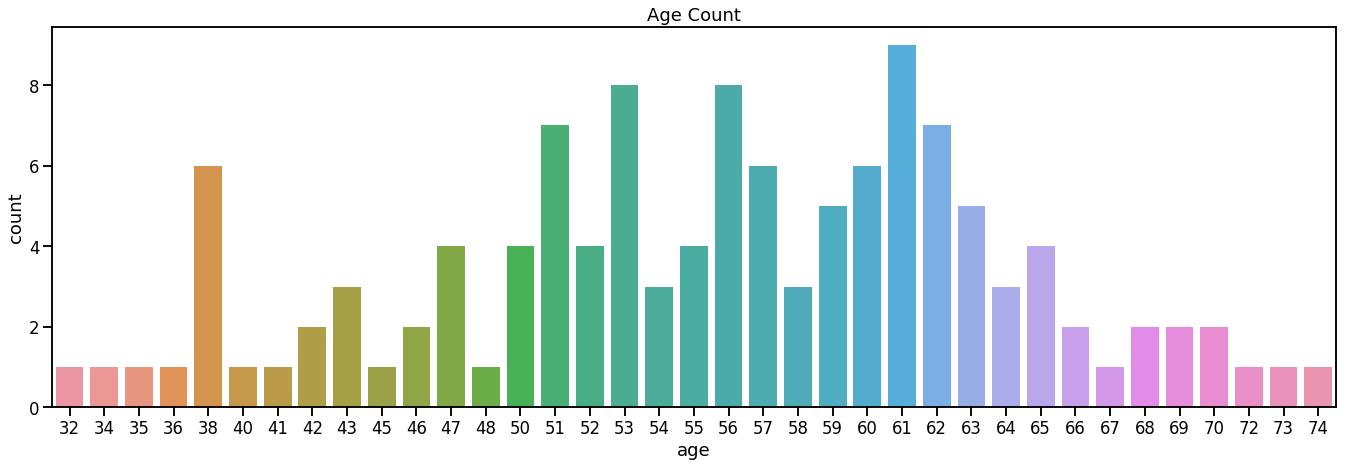

In [16]:
#Age count

plt.figure(figsize=(23,7))
sns.countplot(data['age'])
plt.title('Age Count')

- Above viz. tells us the count of age.


- We can observe that we have most people who are in range of **50 to 60 age.**

([<matplotlib.axis.XTick at 0x7f9d4fbcb2e8>,
 <a list of 3 Text xticklabel objects>)

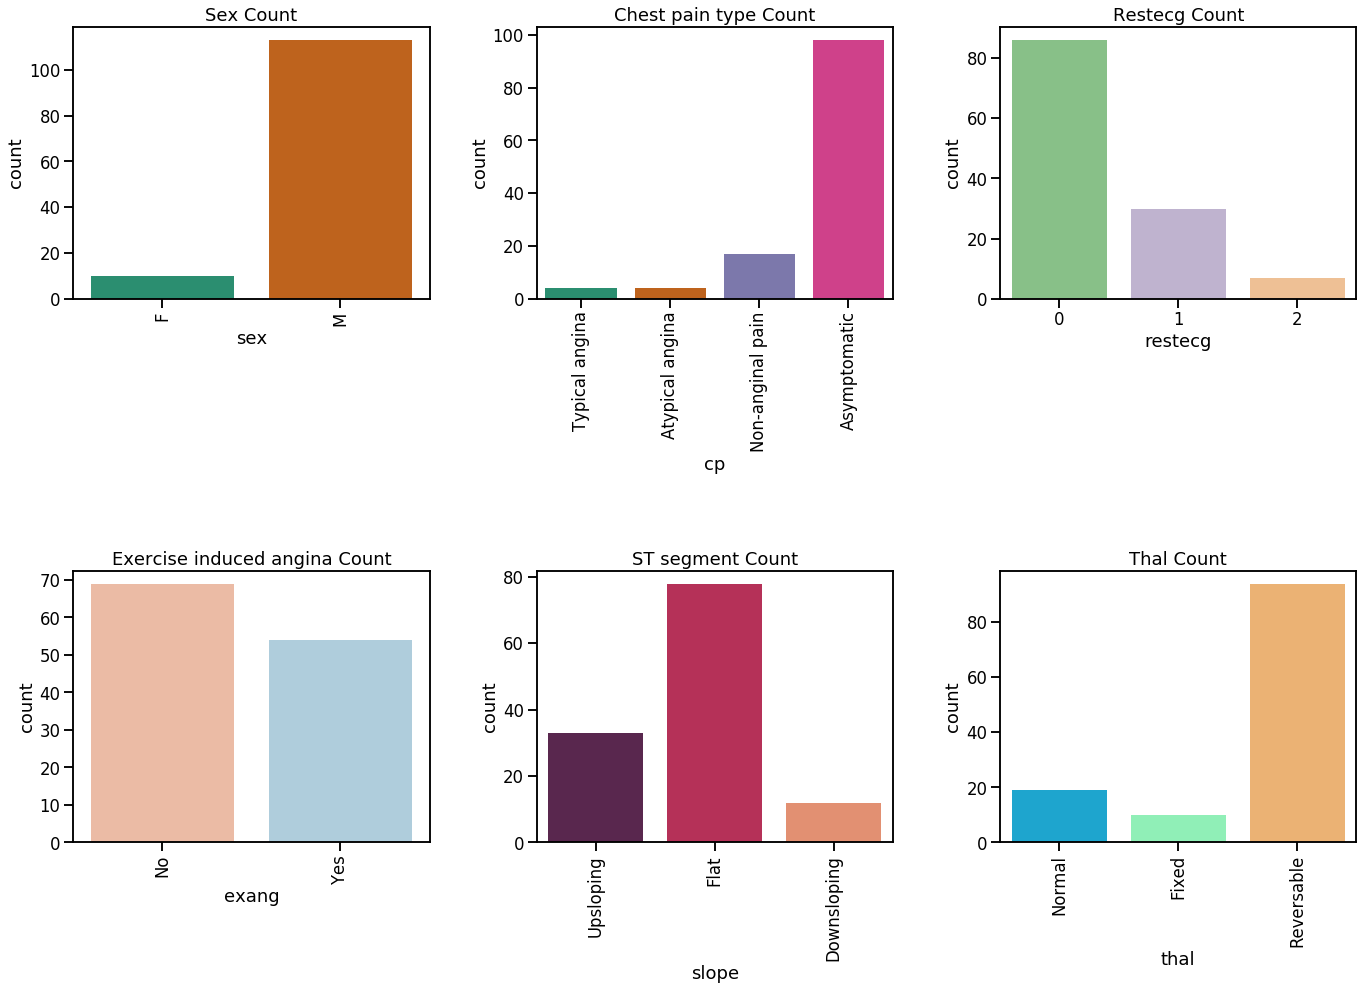

In [17]:
#Exploring Remaining features

sns.set_context('talk')
plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=1)

plt.subplot(2, 3, 1)
sns.countplot(data['sex'] , palette='Dark2')
plt.title('Sex Count')
plt.xticks(ticks=[0, 1], labels=['F', 'M'], rotation=90)

plt.subplot(2, 3, 2)
sns.countplot(data['cp'] , palette='Dark2')
plt.title('Chest pain type Count')
plt.xticks(ticks=[0,1,2,3], labels=['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'], rotation=90)

plt.subplot(2, 3, 3)
sns.countplot(data['restecg'] , palette='Accent')
plt.title('Restecg Count')

plt.subplot(2, 3, 4)
sns.countplot(data['exang'] , palette='RdBu')
plt.title('Exercise induced angina Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=90)

plt.subplot(2, 3, 5)
sns.countplot(data['slope'] , palette='rocket')
plt.title('ST segment Count')
plt.xticks(ticks=[0, 1, 2], labels=['Upsloping', 'Flat', 'Downsloping'], rotation=90)

plt.subplot(2, 3, 6)
sns.countplot(data['thal'] , palette='rainbow')
plt.title('Thal Count')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'Fixed', 'Reversable'], rotation=90)

**Observations :**

- **Plot 1** : We can see that **Male count is dominating the Female count.**


- **Plot 2** : We've **4 chest pain types** of which **Asymptomatic** is **most common** among the people.


- **Plot 3** : **restecg (resting electrocardiographic results)** we've 3 classes here of which Value 0 (normal) is dominant one.


- **Plot 4** : Exercise induced angina Count has 2 classes , **No** being dominant one.


- **Plot 5** : For slope , **Flat** is dominant followed by **Upsloping**.

Text(0.5, 1.0, 'Target Class Count')

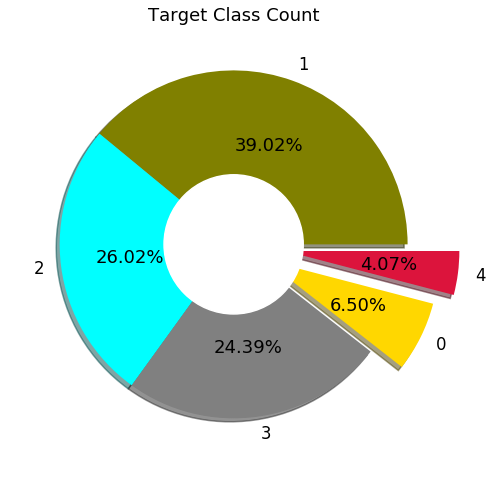

In [18]:
#Target class count

plt.figure(figsize=(8,8))
plt.pie(data['num'].value_counts(), labels=[1,2,3,0,4], autopct='%1.2f%%', explode=[0,0,0,0.2,0.3], shadow=True, colors=['olive', 'aqua', 'grey', 'gold', 'crimson'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

- Above viz. is interesting. We have **5 classes [0, 1, 2, 3, 4].**


- Let us look at the figures :<b>
    - Class 1 - 39.02%
    - Class 2 - 26.02%
    - Class 3 - 24.39%
    - Class 0 - 06.50%
    - Class 4 - 04.07%<br></b>


- We can clearly Identify that **Class 1 , 2 & 3** has dominance over **Class 0 & 4.**


- So we've **Imbalanced Dataset**, if we create model on such data it simply won't predict **Class 0 & 4** very well on **new / unseen data** because we've very less examples of them.


- Next, we'll perform resampling on our dataset, there are 2 types of resampling techniques.

    - **Over-Sampling** : In over-sampling we **upsample the examples** of **minority class.**
    - **Down-Sampling** : In here we **eliminate data of most dominant / majority class**, it is usually brought into picture if we've failry **huge dataset with one (considering Binary values) class being the most dominant**. On **small datasets** down-sampling could cause **loss of important informatation.**
    
    
- We've to perform **Over-sampling since our dataset is small.** Also, in our case we're having **multi-class imbalanced data (Class 0 & 4).** So we need to **upsample both of those classes.**


- Now, in **over-sampling** we've few techniques like **Random Over-sampling , SMOTE (Synthetic Minority Over-sampling Technique), ADASYN (Adaptive Synthetic), etc.**


- **Random Over-sampling** is upsampling technique in which **Random examples of minority class are repeated to match majority class.** While, we've **SMOTE** where it creates **synthetic observations** based upon the existing **minority observations.**


- **SMOTE is widely used in practice** so we'll **implement** the same but the advanced version of it called **SVMSMOTE.**

In [0]:
#Slicing dataset based on minority class 0 & 4

df0 = data[data['num'] == 0]
df4 = data[data['num'] == 4]

- Before documentation I had observed that **SVMSMOTE throws error** because the **examples of minority class are too less to be identified by train-test split.**


- So my plan is to **upsmaple using Random Over-sampling a bit** and then apply **train-test split** so as to carry out **SVMSMOTE.**


- One more point to note is we've to **split dataset before applying SMOTE** because if we perform SMOTE **before train-test split** and then build the model , clearly the **information from validation set is going to leak** & we'll get **illusion of high accuracy.**


- Here is a **link** to **My in-detail analysis & modelling on Imbalanced dataset** : **https://github.com/GauravPadawe/Abalone_9_18-Imbalanced-Dataset-Case-Study/blob/master/Abalone%20(18%20vs%209)%20-%20Imbalanced_Data.ipynb**

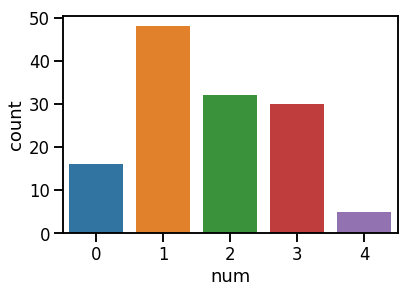

In [20]:
#Random upsample Class 0

df_class_0_osamp = df0.sample(8, replace=True)
over_sampled_df = pd.concat([data, df_class_0_osamp], axis=0)
sns.countplot(over_sampled_df['num'])

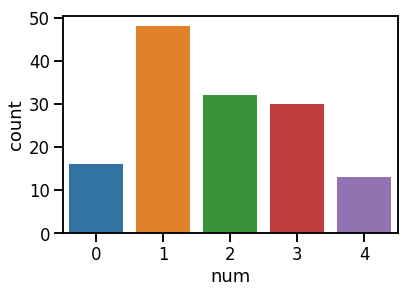

In [21]:
#Random upsample Class 4

df_class_4_osamp = df4.sample(8, replace=True)
over_sampled_df = pd.concat([over_sampled_df, df_class_4_osamp], axis=0)
sns.countplot(over_sampled_df['num'])

- Above viz. is after **Random upsampling Class 0 & Class 4.**


- Further we'll **Normalize** dataset and then **perform 30% train-test split** on it.


- And Finally perform **SVMSMOTE on it.**

In [22]:
#Normalizing dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#cols = data.columns[:-1]
cols = over_sampled_df.columns[:-1]

#norm_df = scaler.fit_transform(data.iloc[:, :-1])
norm_df = scaler.fit_transform(over_sampled_df.iloc[:, :-1])
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=over_sampled_df.iloc[:, :-1].index)
norm_df.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,thal
0,-2.606456,0.278423,-3.850819,-1.527813,-0.625195,0.232030,-0.833740,0.086182,-1.367313,0.451694
1,-2.378309,0.278423,0.477460,-0.614411,-0.625195,1.267473,-0.833740,-0.408828,-1.367313,0.451694
2,-2.264235,0.278423,0.477460,-0.157710,-0.625195,0.347079,1.199415,-0.309826,0.314603,0.451694
3,-2.150162,0.278423,0.477460,-0.842761,-0.625195,0.155330,1.199415,0.383187,0.314603,-0.278370
4,-1.922015,-3.591657,0.477460,-1.071112,-0.625195,1.727670,-0.833740,2.165222,-1.367313,0.451694


- Above we had **Normalized** dataset using **Standard Scaler.**


- And we create new **dataframe** of **Normalized Values.**

In [23]:
#trrain-test split

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#x = data.iloc[:, :-1]
x = norm_df
y = over_sampled_df['num']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((97, 10), (42, 10), (97,), (42,))

- After splitting we get **97 examples for training** & **42 for validation.**


- On these **97 examples** we'll perform **SVMSMOTE** and **train a statistical model.** That model will **predict** on this **validation set.**


- We've **dedicated module** to work on **Imbalanced dataset.** By **imblearn's SVMSMOTE** it becomes easy to perform **SVMSMOTE.**


- We will use **"not majority"** as our **sampling strategy** parameter as it will **not sample majority** but all **minority classes.** We've to do this in case of **multi-class Imbalanced data.**

In [24]:
#Applying SVMSMOTE

from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE

smote = SVMSMOTE(sampling_strategy='not majority')
x_s_res, y_s_res = smote.fit_sample(x_train, y_train)

print (y_train.value_counts(), '\n')
np.bincount(y_s_res)

1    36
2    22
3    20
0    11
4     8
Name: num, dtype: int64 



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


array([36, 36, 36, 36, 36])

- We can examine above that :<b>
    - Class 1 : 36 Samples
    - Class 2 : 22 Samples
    - Class 3 : 20 Samples
    - Class 0 : 11 Samples
    - Class 4 : 08 Samples
    
    
- And After **SVMSMOTE application** we get **36 Samples of each class.**

### Building a Statistical model using SVM Classifier


- We need to understand that **Accuracy Score is not so important here.**


- Our focus must be on **Classification Report** where we have important metrics like **Recall** , **Precision** & **F1-Score.**


- **Accuracy Score** is just **illusion.** For us **best metric** is **Recall Score.** It will show us how much **weight** our **individual classes get.**


### How SVM Works ?

- SVM plots **optimal hyperplane** to **divide classes.**


- It creates **margin on each side of hyperplane / decision boundary.**


- **Margin** is the **sum of distance D+ & D-** which emerges from hyperplane.


- The **data point of one class which lies closer to other class forms a margin.** So we get **2 margins parallel to hyper plane.**


- Those **2 data points of opposite class** which forms our margin are also known as **Support Vectors.**


- The **more** the value of **D- + D+** , the **more accurate is our classification** because it makes sure that **our both classes lie farther from each other.** This **phenomena** is called **Maximal Margin Hyperplane.**


- If we can seperate 2 different classes by a single line then we call it as **linearly seperable** data (as shown in below figure.)

![alt text](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/8bf7212a3ccaa93fcf202654c8e123a62bde71d8/2-Figure1-1.png)<br>


- Sometimes our data is **non-linearly seperable** ,i.e, can't seperate it by line (as shown in below figure).

![alt text](https://i.stack.imgur.com/y5uMX.png)

- As we can observe that it is **not possible to divide these classes by line** because the **class in blue is surrounding class in red** making it non-seperable and so we call it **Non-linearly seperable data.**


- In SVM we've a function called **Kernel Function / Kernel Trick.** Kernel Trick solves our problem of Non-linearly seperable data. It takes **Low dimensional data** as **input** and **outputs** them in **Higher dimension space** so that it can be divided by **hyperplane.** (Refer to figure below)

![alt text](https://cdn-images-1.medium.com/freeze/max/1000/1*GLdskOoCHJ73H6y4iPgYNQ.png?q=20)

- We can observe in **right figure** that how our data looks in **2D.** And after **applying Kernel Trick** we get **3D** output which **left figure** depicts. We can see **2 classes** being **divided by a Hyperplane (in green).**

Accuracy Score : 0.42857142857142855
Validation Score :  0.42857142857142855
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.33      0.40      0.36        10
           2       0.10      0.33      0.15         3
           3       0.50      0.45      0.48        11
           4       0.80      0.36      0.50        11

    accuracy                           0.43        42
   macro avg       0.51      0.42      0.43        42
weighted avg       0.56      0.43      0.46        42



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=650).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


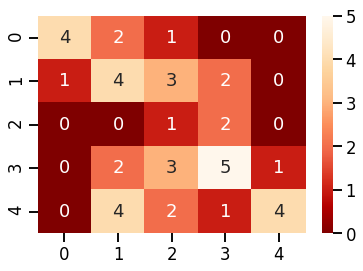

In [28]:
#Importing SVM Classifier And required metrics

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

est_svc = SVC(gamma='auto', kernel='linear', max_iter=650, decision_function_shape='ovo').fit(x_s_res, y_s_res)
pred = est_svc.predict(x_test)

print ('Accuracy Score :', accuracy_score(pred, y_test))
print ('Validation Score : ', est_svc.score(x_test, y_test))
print (classification_report(pred, y_test))

sns.heatmap(confusion_matrix(pred, y_test), annot=True, cmap='OrRd_r')

**Interpretation :**

- Above we have **confusion matrix** which is quite confusing to Interpret. So below is the easiest way to read it. **True Positives and True Negative** are **correct classification.** Or in short we can say that **Diagonal values are correct.**<br>

![alt text](https://blog.exsilio.com/wp-content/uploads/2016/09/table-blog.png)<br>

- Below is basic interpretation of What **Precision & Recall** is :<br>

![alt text](https://i.stack.imgur.com/U0hjG.png)<br>

- We can see that how Recall Score in our case is :<br><b>
    - Class 0 : 4 are classified correct (0.57 Recall).
    - Class 1 : 4 are classified correct (0.40 Recall).
    - Class 2 : 1 is classified correct (0.33 Recall).
    - Class 3 : 5 are classified correct (0.45 Recall).
    - Class 4 : 4 are classified correct (0.36 Recall).
    

- Also our **Accuracy and Validation Score** are close to each other meaning our model **isn't suffering from under-fitting nor over-fitting.**


- Can't say model is good but it is better. Let us try to do **Parameter Tuning** and see how it **optimizes** our model to get best out of it. 

### Hyper-Parameter Tuning

- We'll create a set of Parameters and pass it in GridSearchCV having 5-Fold Cross-Validation.


- GridSearch has a attribute called "best_params_" which can tell us what parameters were chosen as best from all that we passed to it.


- So I'm going with these set of Parameters<b>
    - Kernel : Linear / Poly / RBF (Radial Basis Function)
    - C (Penalty) : Ranging from 1 to 5
    - Gamma : Auto / Scale
    - Decision Function Shape : OVO (One-vs-One) / OVR (One-vs-Rest)
    - Maximum Iteration : 500 to 1000 by difference of 10

In [ ]:
#Hyper Parameter tuning

parameters = {'kernel':('linear', 'rbf', 'poly'), 
              'C':np.arange(1, 5), 'gamma':('scale', 'auto'),
              'decision_function_shape':('ovr', 'ovo'), 'max_iter':np.arange(500,1000,10)}

svc = SVC()

clf = GridSearchCV(svc, parameters, cv=5).fit(x_s_res, y_s_res)

Best Parameters :  {'C': 3, 'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 500}
Accuracy Score : 0.4523809523809524
Validation Score :  0.4523809523809524
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.42      0.38      0.40        13
           2       0.20      0.50      0.29         4
           3       0.30      0.43      0.35         7
           4       0.80      0.36      0.50        11

    accuracy                           0.45        42
   macro avg       0.54      0.48      0.47        42
weighted avg       0.57      0.45      0.48        42



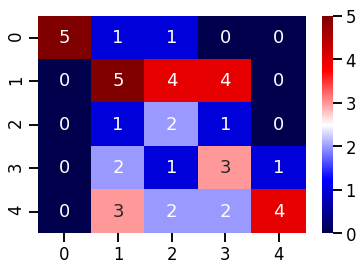

In [30]:
print ('Best Parameters : ', clf.best_params_)
print ('Accuracy Score :', accuracy_score(clf.predict(x_test), y_test))
print ('Validation Score : ', clf.score(x_test, y_test))
print (classification_report(clf.predict(x_test), y_test))

sns.heatmap(confusion_matrix(clf.predict(x_test), y_test), annot=True, cmap='seismic')

- We can now see that our **model's performance has improved.** Recall Scores are better compared to What we had earlier. Let us examine them.


- **Earlier Results were as follows :**<b>
    - Class 0 : 4 are classified correct (0.57 Recall).
    - Class 1 : 4 are classified correct (0.40 Recall).
    - Class 2 : 1 is classified correct (0.33 Recall).
    - Class 3 : 5 are classified correct (0.45 Recall).
    - Class 4 : 4 are classified correct (0.36 Recall).
    
    
- Post Parameter Tuning Results are as follows :**<b>
    - Class 0 : 5 are classified correct (0.71 Recall).
    - Class 1 : 5 are classified correct (0.38 Recall).
    - Class 2 : 2 is classified correct (0.50 Recall).
    - Class 3 : 3 are classified correct (0.43 Recall).
    - Class 4 : 4 are classified correct (0.36 Recall).
    
    
- We can observe that there is **Significant increase in recall** for some classes. We can say that Parameter tuning having these Parameters defined **{'C': 3, 'decision_function_shape': 'ovr', 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 500} gives us decent improved scores** probably much better for Classification.


- Since the dataset was suffering from **multi-class imbalance** , we performed **over-sampling** and now our model can **predict** well on **unseen data** , it would definitely **predict Class 0 & Class 4** as it has got some **weightage.** This would had been not possible if we'll create model on Imbalanced data.


- Also, we can see the **Slight increase in Accuracy.**

### Conclusion :

- **We figured out how our dataset was suffering from multi-class imbalance.**


- **We handled imbalance dataset with the help of combined efforts of Random Upsampling and SMOTE technique.**


- **Since my objective was to just use SVM so I built a model using only SVM and did some parameter tuning.**

### What's next ?

- We can use **various algorithms** to make **better classification.**


- We can also try to **add more Parameters** for **Tuning the model.**


- One can also try to fill **missing values** by **forward / backward** fill.


- One can try also **implement Deep Neural Network** Modelling.